In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.metrics import confusion_matrix

In [43]:
from scipy.stats import norm
X = np.concatenate([norm.rvs(loc=5, scale=2, size=(50, 2)),
                    norm.rvs(loc=0, scale=2, size=(50, 2))], axis=0)
print("X:", X[:10, :])
y = np.zeros(X.shape[0])
y[50:] = 1
print("y:", y)


X: [[6.56390362 4.8025697 ]
 [6.53863931 3.27435261]
 [5.8705893  4.51577515]
 [4.64705179 6.19346952]
 [4.81451978 6.16139105]
 [6.62866266 5.27580818]
 [7.75060857 9.26543308]
 [5.40821431 6.17395286]
 [1.01910077 5.14787175]
 [5.15403161 9.20555509]]
y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


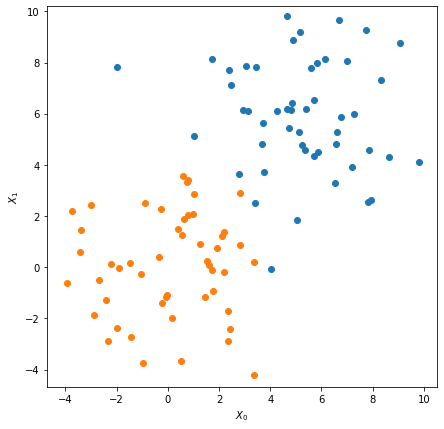

In [44]:
plt.figure(figsize=(7, 7))
for label in np.unique(y):
  plt.scatter(X[y==label, 0], X[y==label, 1], c="C%i" % label)
plt.ylabel("$X_1$")
plt.xlabel("$X_0$")
plt.axis('equal')
plt.show()

In [45]:
# from scipy.stats import linregress
# p = linregress(X, y)
X_lstsq = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
omega = np.linalg.lstsq(X_lstsq, y, rcond=None)[0]

#p[0]*X[:, 0] + p[1]*X[:, 1]
omega

array([ 0.90116147, -0.06597302, -0.07603385])

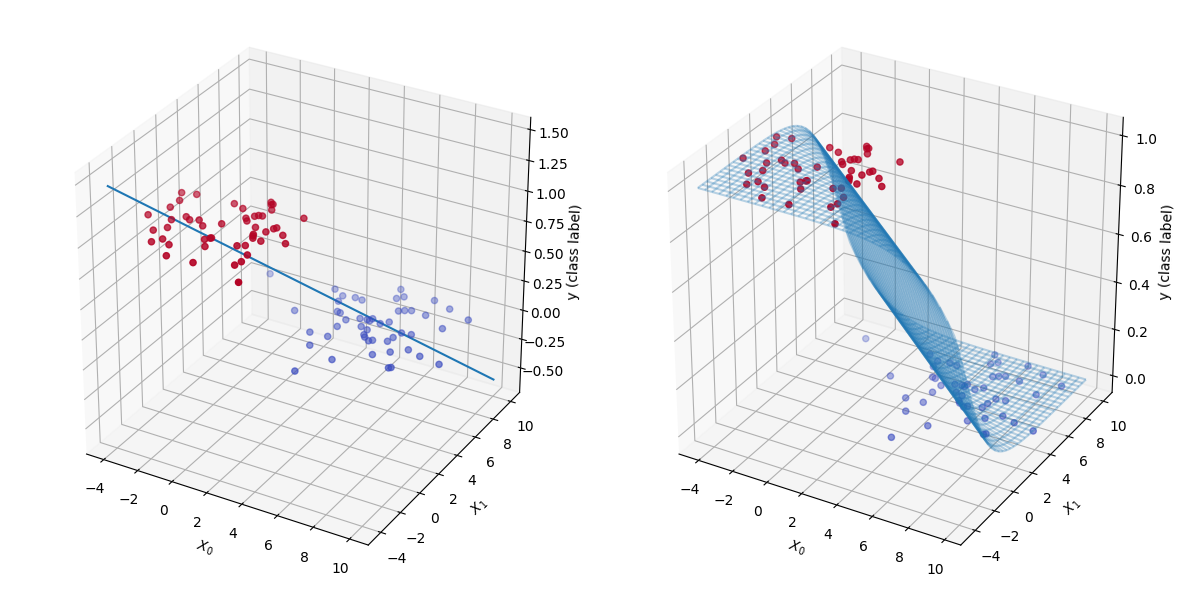

In [46]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

h = .2
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

#Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
sigmoid = lambda z: 1/(1+np.exp(-z))
Z = sigmoid((omega[0]+omega[1]*xx.ravel()+omega[2]*yy.ravel()-.5)*10)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(12, 6), dpi=100)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], y, c=y, cmap=cm.coolwarm)
k = np.linspace(-4, 10, 10)
ax.plot3D(k, k, p[0]+p[1]*k+p[2]*k)
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")
ax.set_zlabel("y (class label)")
# ax.view_init(25, -125)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], y, c=y, cmap=cm.coolwarm)
ax.plot_wireframe(xx, yy, Z, cmap=cm.coolwarm, alpha=.3)
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")
ax.set_zlabel("y (class label)")
# ax.view_init(25, -125)
fig.tight_layout()
fig.show()

Note that the sigmoid function never becomes flat at the extremes (it does come close though). Why?

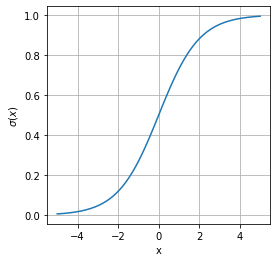

In [47]:
sigmoid = lambda z: 1/(1+np.exp(-z))

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(4, 4))
plt.plot(x, sigmoid(x))
#plt.plot(x, .5+x*.1)
plt.ylabel("$\sigma(x)$")
plt.xlabel("x")
plt.grid()
plt.show()

In [48]:
linreg = lambda omega, X: (omega[0]+omega[1]*X[:, 0]+omega[2]*X[:, 1]).ravel()
logit = lambda omega, X: 1/(1+np.exp(-linreg(omega, X)))
omega = np.ones(3)
np.round(logit(omega, X))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.])

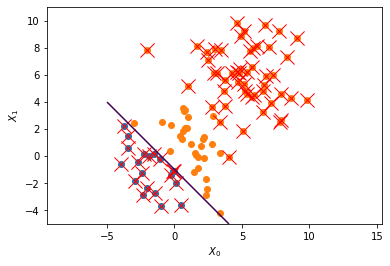

In [49]:
y_prediction = np.round(logit(omega, X))

plt.figure()
plt.scatter(X[y_prediction==0, 0], X[y_prediction==0, 1], c='C0')
plt.scatter(X[y_prediction==1, 0], X[y_prediction==1, 1], c='C1')
plt.scatter(X[y_prediction!=y, 0], X[y_prediction!=y, 1], c="r", marker='x', s=200, linewidth=1)
plt.ylabel("$X_1$")
plt.xlabel("$X_0$")
plt.axis('equal')
area = plt.axis()
xx, yy = np.meshgrid(np.linspace(area[0], area[1], 100),
                      np.linspace(area[2], area[3], 100))
G = np.c_[xx.ravel(), yy.ravel()]
Z = logit(omega, G).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5])
plt.show()

In [50]:
loss = lambda omega: np.sum((logit(omega, X)-y)**2)# + 0.001*np.sum(theta**2)
loss(omega)

63.84069922707902

In [51]:
from scipy.optimize import minimize

res = minimize(loss, omega, options={'disp': True})
omega_star = res.x
print("new omega:", omega_star)

y_prediction = np.round(logit(omega_star, X))
print("Confusion matrix:\n", confusion_matrix(y, y_prediction))

Optimization terminated successfully.
         Current function value: 1.000009
         Iterations: 28
         Function evaluations: 185
         Gradient evaluations: 37
new omega: [ 714.58227365 -115.74753811 -130.54253099]
Confusion matrix:
 [[49  1]
 [ 0 50]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


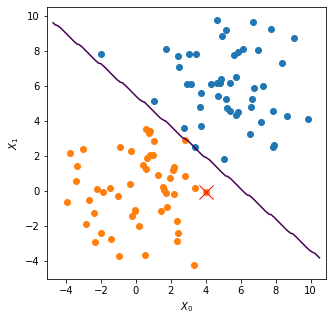

In [52]:
plt.figure(figsize=(5, 5))
plt.scatter(X[y_prediction==0, 0], X[y_prediction==0, 1], c='C0')
plt.scatter(X[y_prediction==1, 0], X[y_prediction==1, 1], c='C1')
plt.scatter(X[y_prediction!=y, 0], X[y_prediction!=y, 1], c="r", marker='x', s=200, linewidth=1)
plt.ylabel("$X_1$")
plt.xlabel("$X_0$")
plt.axis('equal')
area = plt.axis()
xx, yy = np.meshgrid(np.linspace(area[0], area[1], 100),
                      np.linspace(area[2], area[3], 100))
G = np.c_[xx.ravel(), yy.ravel()]
Z = logit(omega_star, G).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5])
plt.show()

In [53]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
print("y:", y)
print("X.shape:", X.shape)

y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
X.shape: (150, 4)


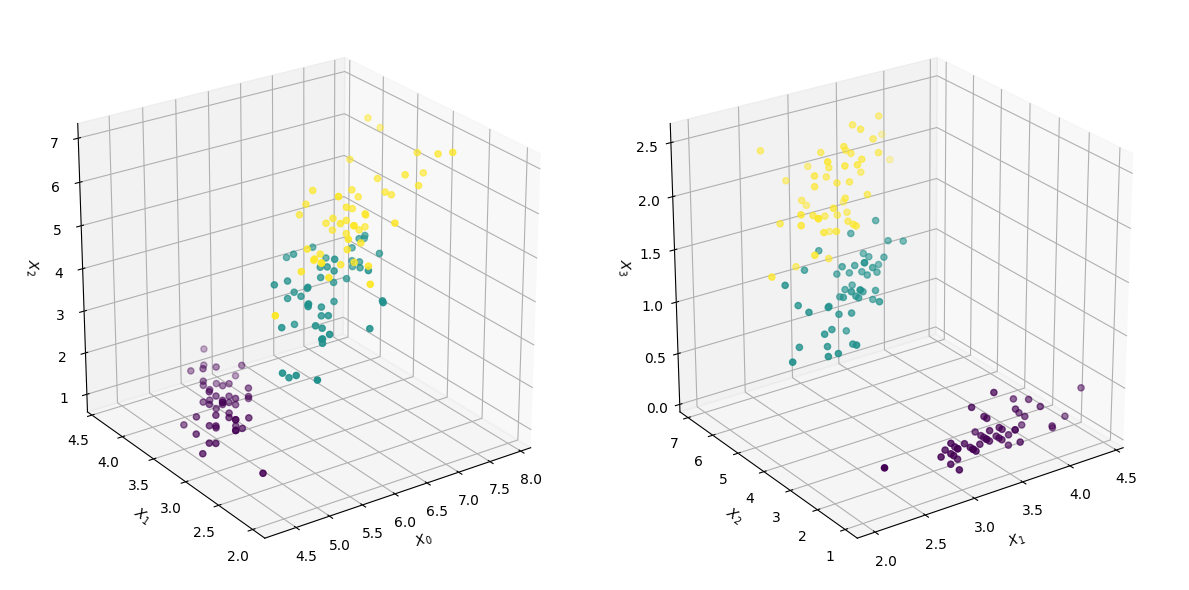

In [54]:
fig = plt.figure(figsize=(12, 6), dpi=100)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")
ax.set_zlabel("$X_2$")
ax.view_init(25, -125)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=y)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$X_3$")
ax.view_init(25, -125)
fig.tight_layout()
fig.show()

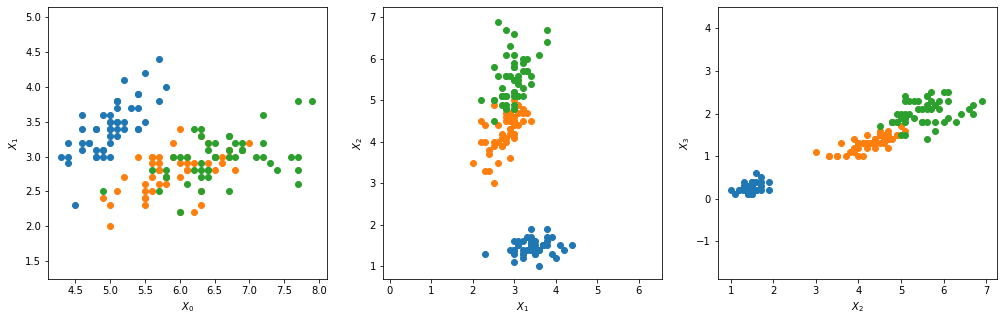

In [55]:
fig = plt.figure(figsize=(17, 5))
ax = fig.subplots(1, 3)
for i in range(len(ax)):
  for label in np.unique(y):
    ax[i].scatter(X[y==label, 0+i], X[y==label, 1+i], c="C%i" % int(label))
  ax[i].set_xlabel("$X_%i$" % (0+i))
  ax[i].set_ylabel("$X_%i$" % (1+i))
  ax[i].axis('equal')
plt.show()

In [56]:
linreg = lambda theta, X: (theta[0]+np.sum([theta[i+1]*X[:, i] for i in range(X.shape[1])], axis=0)).ravel()
theta = np.ones(X.shape[1]+1)
linreg(theta, X)

array([11.2, 10.5, 10.4, 10.4, 11.2, 12.4, 10.7, 11.1,  9.9, 10.6, 11.8,
       11. , 10.3,  9.5, 12.2, 13. , 12. , 11.3, 12.5, 11.7, 11.7, 11.7,
       10.4, 11.6, 11.3, 10.8, 11.4, 11.4, 11.2, 10.7, 10.7, 11.7, 11.9,
       12.3, 10.7, 10.6, 11.5, 11. ,  9.9, 11.2, 11.1,  9.4, 10.1, 11.7,
       12.2, 10.5, 11.7, 10.4, 11.7, 10.9, 17.3, 16.6, 17.4, 14.1, 16.4,
       15.3, 16.9, 12.6, 16.4, 14.2, 12.5, 15.6, 14.2, 16.1, 14.4, 16.6,
       15.6, 14.6, 15.4, 14.1, 16.7, 15.2, 16.2, 15.8, 15.9, 16.4, 16.8,
       17.4, 15.9, 13.8, 13.8, 13.6, 14.6, 16.4, 15.4, 16.5, 17. , 15.3,
       15. , 14.3, 14.7, 16.1, 14.6, 12.6, 14.8, 15.1, 15.1, 15.7, 12.7,
       14.9, 19.1, 16.5, 19.1, 17.6, 18.5, 20.3, 14.6, 19.3, 17.8, 20.4,
       17.8, 17.3, 18.4, 16.2, 17.1, 18.2, 17.8, 21.4, 20.5, 15.7, 19.1,
       16.3, 20.2, 16.7, 18.8, 19.2, 16.6, 16.8, 17.9, 18.6, 19.2, 21.1,
       18. , 16.7, 16.7, 20.1, 18.7, 17.8, 16.6, 18.5, 18.8, 18.4, 16.5,
       19.2, 19.2, 18.2, 16.7, 17.7, 18.3, 16.8])

In [57]:
logit = lambda theta, X: 1/(1+np.exp(-linreg(theta, X)))
theta = np.ones(5)
logit(theta, X)

array([0.99998633, 0.99997246, 0.99996957, 0.99996957, 0.99998633,
       0.99999588, 0.99997746, 0.99998489, 0.99994983, 0.99997508,
       0.9999925 , 0.9999833 , 0.99996637, 0.99992515, 0.99999497,
       0.99999774, 0.99999386, 0.99998763, 0.99999627, 0.99999171,
       0.99999171, 0.99999171, 0.99996957, 0.99999083, 0.99998763,
       0.9999796 , 0.9999888 , 0.9999888 , 0.99998633, 0.99997746,
       0.99997746, 0.99999171, 0.99999321, 0.99999545, 0.99997746,
       0.99997508, 0.99998987, 0.9999833 , 0.99994983, 0.99998633,
       0.99998489, 0.99991728, 0.99995892, 0.99999171, 0.99999497,
       0.99997246, 0.99999171, 0.99996957, 0.99999171, 0.99998154,
       0.99999997, 0.99999994, 0.99999997, 0.99999925, 0.99999992,
       0.99999977, 0.99999995, 0.99999663, 0.99999992, 0.99999932,
       0.99999627, 0.99999983, 0.99999932, 0.9999999 , 0.99999944,
       0.99999994, 0.99999983, 0.99999954, 0.99999979, 0.99999925,
       0.99999994, 0.99999975, 0.99999991, 0.99999986, 0.99999

In [58]:
np.unique(y)

array([0, 1, 2])

In [59]:
one_vs_all = lambda theta, X: theta[0]*logit(theta[1:6], X) + theta[6]*logit(theta[7:12], X) + theta[12]*logit(theta[13:18], X)
theta = np.ones(18)
one_vs_all(theta, X)

array([2.99995898, 2.99991739, 2.99990871, 2.99990871, 2.99995898,
       2.99998764, 2.99993237, 2.99995466, 2.99984948, 2.99992525,
       2.99997749, 2.9999499 , 2.9998991 , 2.99977546, 2.99998491,
       2.99999322, 2.99998157, 2.99996288, 2.99998882, 2.99997512,
       2.99997512, 2.99997512, 2.99990871, 2.9999725 , 2.99996288,
       2.9999388 , 2.99996641, 2.99996641, 2.99995898, 2.99993237,
       2.99993237, 2.99997512, 2.99997963, 2.99998634, 2.99993237,
       2.99992525, 2.99996961, 2.9999499 , 2.99984948, 2.99995898,
       2.99995466, 2.99975185, 2.99987677, 2.99997512, 2.99998491,
       2.99991739, 2.99997512, 2.99990871, 2.99997512, 2.99994463,
       2.99999991, 2.99999981, 2.99999992, 2.99999774, 2.99999977,
       2.99999932, 2.99999986, 2.99998988, 2.99999977, 2.99999796,
       2.99998882, 2.9999995 , 2.99999796, 2.99999969, 2.99999833,
       2.99999981, 2.9999995 , 2.99999863, 2.99999938, 2.99999774,
       2.99999983, 2.99999925, 2.99999972, 2.99999959, 2.99999

In [60]:
loss = lambda theta: np.sum((one_vs_all(theta, X)-y)**2) + 0.001*np.sum(np.abs(theta))
loss(theta)

700.0000904611514

In [61]:
res = minimize(loss, theta, options={'disp': True})
theta_star = res.x
print("New theta", res.x)
print("Confusion matrix:\n", confusion_matrix(y, np.round(one_vs_all(theta_star, X))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


         Current function value: 1.560298
         Iterations: 122
         Function evaluations: 5912
         Gradient evaluations: 295
New theta [-2.42033698e-04  9.75516862e+00  2.64089208e+01  9.03848517e+00
 -4.30881204e+01  1.78511574e+01  9.94978004e-01 -4.39774572e-09
  4.69930252e-01 -9.74952651e+00  1.26924739e+01  1.46785917e+00
  9.91540286e-01 -1.36954483e+02 -1.64977090e+01 -2.11273118e+01
  4.64590172e+01  4.31429670e+01]
Confusion matrix:
 [[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


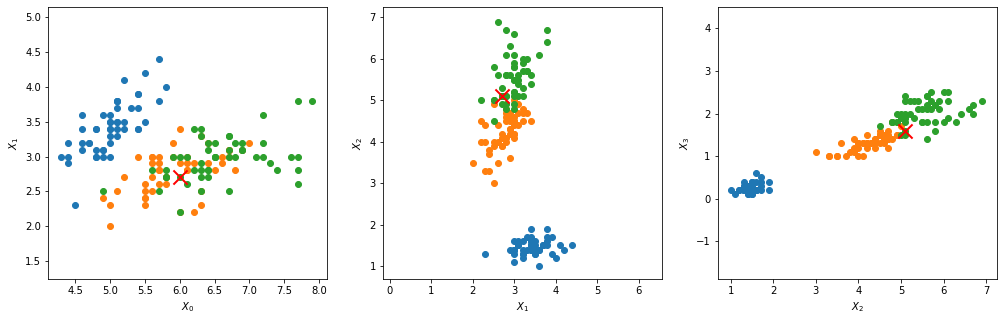

In [62]:
y_prediction = np.round(one_vs_all(theta_star, X))

fig = plt.figure(figsize=(17, 5))
ax = fig.subplots(1, 3)
for i in range(len(ax)):
  for label in np.unique(y):
    ax[i].scatter(X[y_prediction==label, 0+i], X[y_prediction==label, 1+i], c="C%i" % int(label))
  ax[i].scatter(X[y_prediction!=y, 0+i], X[y_prediction!=y, 1+i], c="r", marker='x', s=200, linewidth=2)
  ax[i].set_xlabel("$X_%i$" % (0+i))
  ax[i].set_ylabel("$X_%i$" % (1+i))
  ax[i].axis('equal')
plt.show()

In [63]:
simplified = lambda theta, X: theta[0]*logit(theta[1:6], X) + theta[6]*logit(theta[7:12], X)
theta = np.ones(12)
simplified(theta, X)

array([1.99997265, 1.99994493, 1.99993914, 1.99993914, 1.99997265,
       1.99999176, 1.99995491, 1.99996978, 1.99989966, 1.99995017,
       1.99998499, 1.9999666 , 1.99993274, 1.99985031, 1.99998994,
       1.99999548, 1.99998771, 1.99997525, 1.99999255, 1.99998341,
       1.99998341, 1.99998341, 1.99993914, 1.99998167, 1.99997525,
       1.9999592 , 1.99997761, 1.99997761, 1.99997265, 1.99995491,
       1.99995491, 1.99998341, 1.99998642, 1.9999909 , 1.99995491,
       1.99995017, 1.99997974, 1.9999666 , 1.99989966, 1.99997265,
       1.99996978, 1.99983457, 1.99991784, 1.99998341, 1.99998994,
       1.99994493, 1.99998341, 1.99993914, 1.99998341, 1.99996308,
       1.99999994, 1.99999988, 1.99999994, 1.9999985 , 1.99999985,
       1.99999955, 1.99999991, 1.99999326, 1.99999985, 1.99999864,
       1.99999255, 1.99999966, 1.99999864, 1.9999998 , 1.99999889,
       1.99999988, 1.99999966, 1.99999909, 1.99999959, 1.9999985 ,
       1.99999989, 1.9999995 , 1.99999982, 1.99999973, 1.99999

In [64]:
loss = lambda theta: np.sum((simplified(theta, X)-y)**2) + 0.0001*np.sum(theta**2)
loss(theta)

249.99328116303727

In [65]:
res = minimize(loss, theta, options={'disp': True})
theta_star = res.x
print("New theta", res.x)
print("Confusion matrix:\n", confusion_matrix(y, np.round(simplified(theta_star, X))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


Optimization terminated successfully.
         Current function value: 1.895713
         Iterations: 155
         Function evaluations: 2702
         Gradient evaluations: 193
New theta [  0.99250252 -30.01671463 -14.78031267 -14.54682031  25.68609614
  22.28693187   0.99609298  -0.57658497  -0.99779129  -2.58954716
   4.59575735   2.43647326]
Confusion matrix:
 [[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


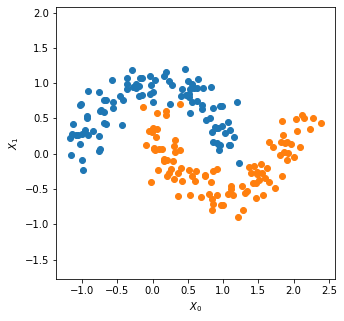

In [66]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.15)

plt.figure(figsize=(5, 5))
for label in np.unique(y):
  plt.scatter(X[y==label, 0], X[y==label, 1], c="C%i" % int(label))
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.axis('equal')
plt.show()

In [67]:
combination_of_three = lambda theta, X: sigmoid(theta[0]*logit(theta[1:6], X) + theta[6]*logit(theta[7:12], X) + theta[12]*logit(theta[13:18], X) + theta[18])
theta = np.ones(19)
combination_of_three(theta, X)[:20]

array([0.94180763, 0.95933635, 0.96304195, 0.97918486, 0.96620927,
       0.91199117, 0.97628165, 0.97592635, 0.97169653, 0.97498204,
       0.97675527, 0.9794169 , 0.95802998, 0.97897839, 0.97091876,
       0.96449339, 0.97694863, 0.97673691, 0.96294613, 0.96725304])

In [68]:
loss = lambda theta: np.sum((combination_of_three(theta, X)-y)**2) + 0.0001*np.sum(theta**2)
loss(theta)

93.35686952690719

In [69]:
theta = np.random.uniform(-10, 10, size=theta.shape)
res = minimize(loss, theta, options={'disp': True})
theta_star = res.x
print("New theta", res.x)
print("Confusion matrix:\n", confusion_matrix(y, np.round(combination_of_three(theta_star, X))))

Optimization terminated successfully.
         Current function value: 1.272310
         Iterations: 189
         Function evaluations: 4473
         Gradient evaluations: 213
New theta [ 2.27062980e+01  8.25291129e+00 -1.11764573e+01 -1.12623609e+01
 -9.42611798e-04  2.21495562e-03  1.27282112e+01 -1.58400239e+01
  1.07293726e+01 -6.18408298e+00  1.96158085e-03  2.17022947e-04
 -2.42247358e+01 -4.62005748e+00 -9.63836707e+00  5.57390956e+00
  1.54712072e-03 -3.13387376e-03 -4.16835666e+00]
Confusion matrix:
 [[100   0]
 [  1  99]]


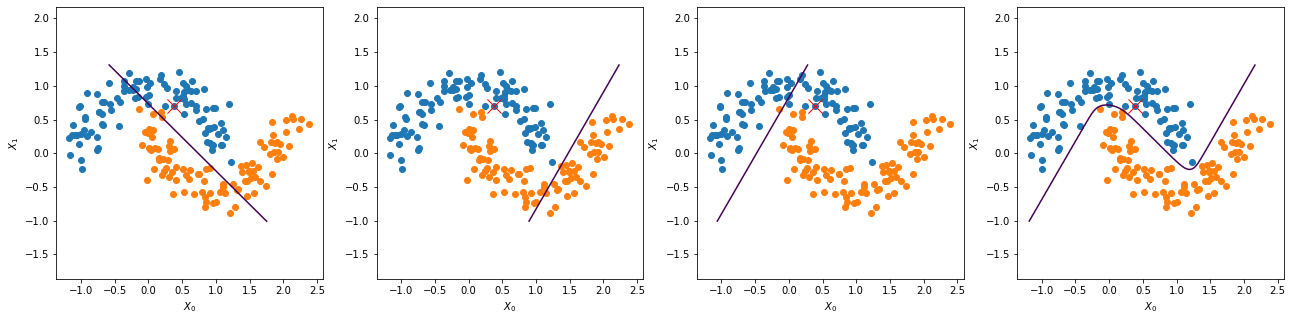

In [70]:
y_prediction = np.round(combination_of_three(theta_star, X))

fig = plt.figure(figsize=(22, 5))
ax = fig.subplots(1, 4)
for subidx in range(len(ax)):
  for label in np.unique(y):
    ax[subidx].scatter(X[y_prediction==label, 0], X[y_prediction==label, 1], c="C%i" % int(label))
  ax[subidx].scatter(X[y_prediction!=y, 0], X[y_prediction!=y, 1], c="r", marker='x', s=200, linewidth=1)
  ax[subidx].set_xlabel("$X_0$")
  ax[subidx].set_ylabel("$X_1$")
  ax[subidx].axis('equal')
  area = ax[subidx].axis()
  xx, yy = np.meshgrid(np.linspace(area[0], area[1], 100),
                       np.linspace(area[2], area[3], 100))
  G = np.c_[xx.ravel(), yy.ravel()]
  if subidx < 3:
    Z = logit(theta_star[1+subidx*6:6+subidx*6], G).reshape(xx.shape)
  else:
    Z = combination_of_three(theta_star, G).reshape(xx.shape)
  ax[subidx].contour(xx, yy, Z, levels=[0.5])
  #ax[subidx].contour(xx, yy, Z, levels=[.25, 0.5, .75])
plt.show()

In [0]:
# fig = plt.figure(figsize=(8, 5), dpi=100)
# ax = fig.add_subplot(1, 1, 1, projection='3d')
# for label, colour in zip(np.unique(t), plt.cm.tab10(np.unique(t))):
#   ax.scatter(mnist_tsne[t==label, 0], mnist_tsne[t==label, 1],
#               mnist_tsne[t==label, 2], c=np.vstack(colour).T, marker='o',
#               alpha=.3, label="%i" % label)
# ax.legend()

# def init():
#     ax.view_init(20, 0)
#     return fig,

# def update(frame):
#     angle = frame % 360
#     ax.view_init(20, angle)
#     return fig,

# anim = FuncAnimation(fig, update, frames=range(360), interval=30, init_func=init, blit=True)
# HTML(anim.to_html5_video())

In [0]:
# anim.save("mnist_tsne.mp4", fps=30, extra_args=['-vcodec', 'libx264'])
# #anim.save('filename.gif', writer='ffmpeg')

# from google.colab import files
# # files.download("newsgroups_tsne.mp4")
# # files.download("newsgroups_pca.mp4")
# # files.download("mnist_tsne.mp4")
# !ls
